# Performing Numerical Analysis on Lotka-Volterra Equations for the Groth of Biological Groups

## Geli Zhang

## Introduction：

When scientists predict the dynamic changes of predators and preys in the nature, they often use the Lotka–Volterra equations. The Lotka–Volterra equations are a set of first-order nonlinear DEs describing the population changes of two species, one prey and one predator. The populations vary as time passes accordingly to the following pair of equations:
$$dx/dt=\alpha x-\beta xy \\dy/dt=\delta xy-\gamma y$$
where
$x$ is the number of prey (for instance, lambs),
$y$ is the number of some predator (for instance, wolves),
$t$ represents time,
$\alpha,\beta,\delta,\gamma$ are positive real parameters describing the interaction of the two species,
${\displaystyle {\tfrac {dy}{dt}}}$ and ${\displaystyle {\tfrac {dx}{dt}}}$ is the current growth rates of the two populations.

Furthermore, the Lotka-Volterra equations can be developed into Kolmogorov model, which is a more general model to describe systems involving predator–prey relationship, mutualism, and competetion.

Here we present a numerical solution to the Lotka-Volterra equations, harnessing python. Using Euler's method for timestep approxiamation, $$f(t+\Delta t)=f(t)+\displaystyle {\tfrac {df}{dt}}(t)*\Delta t$$, we calculated the population changes of both the prey and the predator in a time period of [0,50]. We then have drawn graphics to exclusivly show the process, and changed the initial conditions and parameters in order to see various numerical phenomenon.

## Basic Coding of the Method

We are using numpy and matplotlib as tools.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Each time, we update the new populations with the following function as time_step

In [2]:
#Euler's method code
def time_step(populations, delta_t, parameters):
    x, y = populations[0], populations[1]
    A, B, C, D = parameters[0], parameters[1], parameters[2], parameters[3]
    delta_T = np.array([delta_t, delta_t])
    dynamic = [A*x-B*x*y, C*x*y-D*y]
    return populations + delta_T * dynamic

Here we compute the population changes through time saved in the matrix DATA.

In [3]:
TIME = 50
P0 = np.array([0.9, 0.9])
parameters = [2/3, 4/3, 1, 1]
NUM_OF_TIMES = 500000
delta_t = TIME/NUM_OF_TIMES
#DATA is what we use to store the calculation results, there are 3 lines, 
#the first line is x, the number of prey.
#The second line is y, the number of predator.
#The third line is the corresponding time
DATA = np.zeros(shape=(3, NUM_OF_TIMES))

T = np.linspace(0, TIME, num=NUM_OF_TIMES)
DATA[0:2, 0] = P0
DATA[2, :] = T
for i in range(NUM_OF_TIMES-1):
    DATA[0:2, i+1] =time_step(DATA[0:2, i], delta_t, parameters)

Then we can draw a picture with matplotlib to show the population change exclusively.
The red line marks for the prey and the blue line marks for the predator.

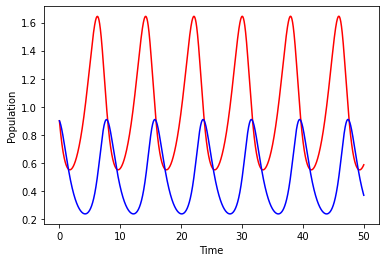

In [4]:
#The number of prey and predator changes over time
plt.plot(DATA[2], DATA[0], 'r', DATA[2], DATA[1], 'b')
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

We can also see the relationship of the two populations as below. As time goes, they are like repeatingly going arround a mere circle.

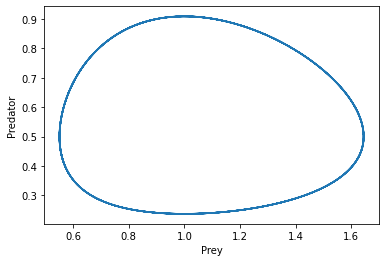

In [5]:
#The running track of prey and predator together
plt.plot(DATA[0], DATA[1])
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.show()

This circling structure is more observable as we change the initial conditions of the system.

In [6]:
#Compute model results x y for different initial conditions
TIME = 50
P0 = np.array([[0.5, 0.5],[0.6,0.6],[0.7,0.7],[0.8,0.8],[0.9,0.9],[1.0,1.0],[1.1,1.1]])
parameters = [2/3, 4/3, 1, 1]
NUM_OF_TIMES = 500000
delta_t = TIME/NUM_OF_TIMES
DATA = np.zeros(shape=(7,3, NUM_OF_TIMES))
T = np.linspace(0, TIME, num=NUM_OF_TIMES)
for j in range(7):
    DATA[j,0:2, 0] = P0[j]
    DATA[j,2, :] = T
    for i in range(NUM_OF_TIMES-1):
        DATA[j,0:2, i+1] =time_step(DATA[j,0:2, i], delta_t, parameters)

As we can see below, different initial conditions causes different orbits in similar shapes.

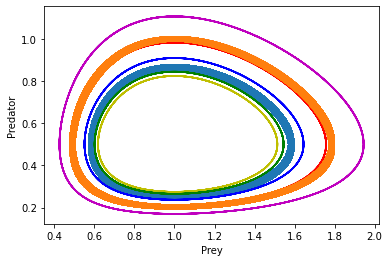

In [7]:
plt.plot(DATA[0,0], DATA[0,1], 'r',
        DATA[1,0], DATA[1,1], 'o',
        DATA[2,0], DATA[2,1], 'y',
        DATA[3,0], DATA[3,1], 'g',
        DATA[4,0], DATA[4,1], 'b',
        DATA[5,0], DATA[5,1], 'p',
        DATA[6,0], DATA[6,1], 'm')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.show()

## Numerical Phenomeno

We can change the parameters in the system according to our own interest and see different numerical results.

For example, we switch to different parameter values of $\delta$ and find out how the pradator's ability to harness energy provided by the prey affects the overall system. The equations are given as:$$dx/dt=\alpha x-\beta xy \\dy/dt=\delta xy-\gamma y$$ Then the term $\delta xy$ can be interpreted as the energy taken from the prey, **it can be infered that the bigger $\delta$ is, the better the predator can use the energy of the prey for itself**.

In [8]:
#Here we are calculating the influence of different gamma.
TIME = 50
P0 = np.array([[0.9,0.9]])
parameters = [[2/3, 4/3, 0.7, 1],
             [2/3, 4/3, 0.8, 1],
             [2/3, 4/3, 0.9, 1],
             [2/3, 4/3, 1, 1],
             [2/3, 4/3, 1.1, 1],
             [2/3, 4/3, 1.2, 1],
             [2/3, 4/3, 1.3, 1],]
NUM_OF_TIMES = 500000
delta_t = TIME/NUM_OF_TIMES
DATA = np.zeros(shape=(7,3, NUM_OF_TIMES))
T = np.linspace(0, TIME, num=NUM_OF_TIMES)
for j in range(7):
    DATA[j,0:2, 0] = P0
    DATA[j,2, :] = T
    for i in range(NUM_OF_TIMES-1):
        DATA[j,0:2, i+1] =time_step(DATA[j,0:2, i], delta_t, parameters[j])

As we can see from the following pistures, **the bigger the parameter $\delta$ is, the smaller the prey's population is in a long period of time. Besides, with larger $\delta$, there still won't be a perceptable change in the population of the predator.**

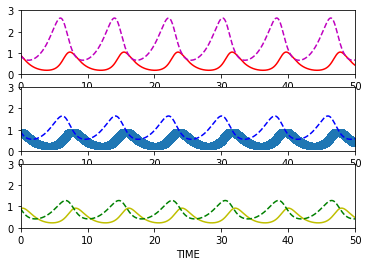

In [9]:
T_SHOWN=NUM_OF_TIMES
plt.subplot(311)
plt.plot(DATA[0, 2,0:T_SHOWN], DATA[0, 1,0:T_SHOWN], 'r',DATA[0, 2,0:T_SHOWN], DATA[0, 0,0:T_SHOWN], 'm--')
plt.axis([0,50,0,3])
plt.subplot(312)
plt.plot(DATA[3, 2,0:T_SHOWN], DATA[3, 1,0:T_SHOWN], 's',DATA[3, 2,0:T_SHOWN], DATA[3, 0,0:T_SHOWN], 'b--')
plt.axis([0,50,0,3])
plt.subplot(313)
plt.plot(DATA[6, 2,0:T_SHOWN], DATA[6, 1,0:T_SHOWN], 'y',DATA[6, 2,0:T_SHOWN], DATA[6, 0,0:T_SHOWN], 'g--')
plt.xlabel('TIME')
plt.axis([0,50,0,3])
plt.show()

We can switch different $\alpha$ to see **how the natrual grouth rate of the prey affects the system.**

In [10]:
#Here we are calculating the influence of different alphas
TIME = 50
P0 = np.array([[0.9,0.9]])
parameters = [[0.4, 4/3, 1, 1],
             [0.5, 4/3, 1, 1],
             [0.6, 4/3, 1, 1],
             [0.7, 4/3, 1, 1],
             [0.8, 4/3, 1, 1],
             [0.9, 4/3, 1, 1],
             [1, 4/3, 1, 1],]
NUM_OF_TIMES = 500000
delta_t = TIME/NUM_OF_TIMES
DATA = np.zeros(shape=(7,3, NUM_OF_TIMES))
T = np.linspace(0, TIME, num=NUM_OF_TIMES)
for j in range(7):
    DATA[j,0:2, 0] = P0
    DATA[j,2, :] = T
    for i in range(NUM_OF_TIMES-1):
        DATA[j,0:2, i+1] =time_step(DATA[j,0:2, i], delta_t, parameters[j])

As the graphs below we found out that the bigger $\alpha$ is, **the more likely the system is to be stable numerically**.

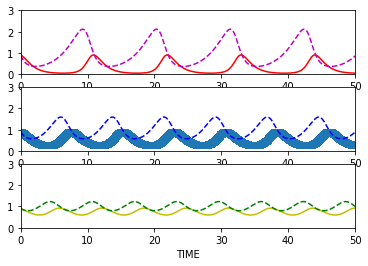

In [11]:
T_SHOWN=NUM_OF_TIMES
plt.subplot(311)
plt.plot(DATA[0, 2,0:T_SHOWN], DATA[0, 1,0:T_SHOWN], 'r',DATA[0, 2,0:T_SHOWN], DATA[0, 0,0:T_SHOWN], 'm--')
plt.axis([0,50,0,3])
plt.subplot(312)
plt.plot(DATA[3, 2,0:T_SHOWN], DATA[3, 1,0:T_SHOWN], 's',DATA[3, 2,0:T_SHOWN], DATA[3, 0,0:T_SHOWN], 'b--')
plt.axis([0,50,0,3])
plt.subplot(313)
plt.plot(DATA[6, 2,0:T_SHOWN], DATA[6, 1,0:T_SHOWN], 'y',DATA[6, 2,0:T_SHOWN], DATA[6, 0,0:T_SHOWN], 'g--')
plt.xlabel('TIME')
plt.axis([0,50,0,3])
plt.show()

## Conclusion

As we can see from the experimental results given above, numerical methods can be used to calculate and predict many quantatives in a system governed by a set of odes. This calculation and prediction also possess the potential to reveal some systematic characteristics of common situations. Many of these characteristics obtained from computing can be further harnessed for the use of theoritical analysises as a validation of our theories. As a result, scientific computing and numerical methods are playing important roles in today's scientific research.